In [1]:
import lifelines
lifelines.__version__

'0.27.8'

In [2]:
import statsmodels.api
statsmodels.api.__version__

'0.13.5'

In [3]:
from lifelines import KaplanMeierFitter,CoxPHFitter
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import numpy as np

# 1. Import data for survival analysis

In [4]:
survival=pd.read_csv('test_FS6_Survival.csv')
survival=survival.rename({'age':'Age','bmi':'BMI','education':'Education','sex':'Sex','date_diff':'Lag Time','metabo_health':'MetaboHealth'},axis=1)



###need event time and event variables
#event (dementia or mortality)
    #1: yes
    #0: no
    
    
#event time: time to develop event (in years)
    #for cases: (diagnose date - scan date)/365
    #for controls: (censored date - scan date)/365


In [5]:
###Create BrainAge Gap and MetaboAge Gap variables
survival['BAG']=survival['brain_age']-survival['Age']
survival['MAG']=survival['metabo_age']-survival['metaboage']

# 2. Include age only

## predict dementia

In [6]:
###CPH model
coxph = CoxPHFitter()
survival_df = survival[['Age','BAG','MAG','event_time_d','dementia']].dropna()
survival_df=survival_df[survival_df.event_time_d>0]

cph1 = coxph.fit(survival_df,'event_time_d','dementia')
cph1.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
Age,0.162983,0.016606,9.726779e-23
BAG,0.146602,0.022495,7.165771e-11
MAG,-0.006622,0.012090,5.838890e-01


In [7]:
###1st and 3rd quartiles of BAG and MAG
print(np.quantile(survival_df['MAG'],[0.25,0.75]))
print(np.quantile(survival_df['BAG'],[0.25,0.75]))

[-8.23237853  3.86230309]
[-3.0579071   4.13154602]


Text(0.5, 1.0, 'Survival curves, Age-adjusted model, RS')

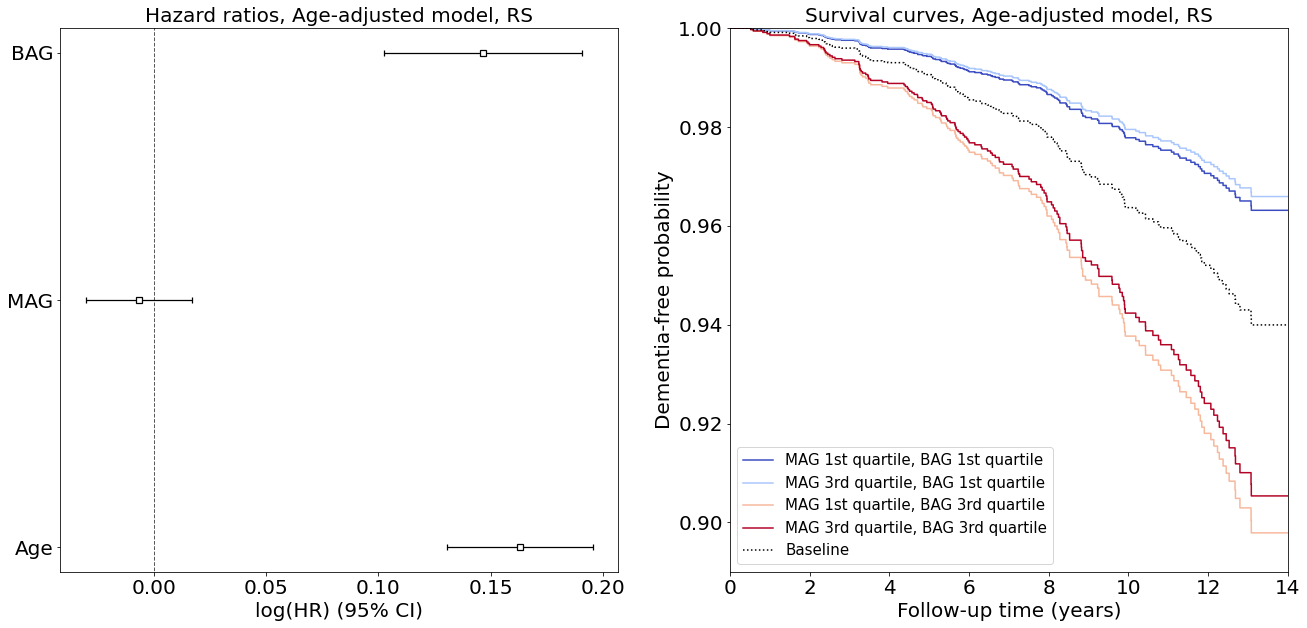

In [8]:
fig, ax = plt.subplots(figsize = (22,10))

###Plot Hazard ratio 
ax1=plt.subplot(121)
cph1.plot(columns = ['BAG', 'MAG', 'Age'], ax=ax1)
ax1.set_xlabel(ax1.get_xlabel(), fontsize=20)  # X-axis label
ax1.set_ylabel(ax1.get_ylabel(), fontsize=20)  # Y-axis label
ax1.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax1.set_facecolor('white')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')

plt.title("Hazard ratios, Age-adjusted model, RS",fontsize=20)



###Plot Survival curve on quartiles
ax2=plt.subplot(122)
cph1.plot_partial_effects_on_outcome(['MAG','BAG'], values=[
 [-8.23237853, -3.0579071],
 [3.86230309,  -3.0579071],
 [-8.23237853, 4.13154602],
 [3.86230309,  4.13154602]], cmap='coolwarm',ax=ax2)


ax2.set_xlabel('Follow-up time (years)',fontsize = 20)
ax2.set_ylabel('Dementia-free probability',fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax2.set_facecolor('white')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')

handles, labels = ax2.get_legend_handles_labels()
labels = ['MAG 1st quartile, BAG 1st quartile', 'MAG 3rd quartile, BAG 1st quartile', 'MAG 1st quartile, BAG 3rd quartile','MAG 3rd quartile, BAG 3rd quartile', 'Baseline'] 
ax2.legend(handles, labels,fontsize=15,facecolor='white')

plt.ylim([0.89, 1])
plt.xlim([0, 14])
plt.title("Survival curves, Age-adjusted model, RS",fontsize = 20)

## predict mortality

In [9]:
###CPH model
coxph = CoxPHFitter()
survival_df = survival[['Age','BAG','MAG','event_time_m','mortality']].dropna()
survival_df=survival_df[survival_df.event_time_m>0]

cph1 = coxph.fit(survival_df,'event_time_m','mortality')
cph1.summary[['coef', 'se(coef)', 'p']]


,coef,se(coef),p
covariate,,,
Age,0.122766,0.007464,8.807091e-61
BAG,0.049044,0.010523,3.154564e-06
MAG,0.009529,0.005956,1.096035e-01


In [10]:
###1st and 3rd quartiles of BAG and MAG
print(np.quantile(survival_df['MAG'],[0.25,0.75]))
print(np.quantile(survival_df['BAG'],[0.25,0.75]))

[-8.20671326  3.77366505]
[-3.07104492  4.13314247]


Text(0.5, 1.0, 'Survival curves, Age-adjusted model, RS')

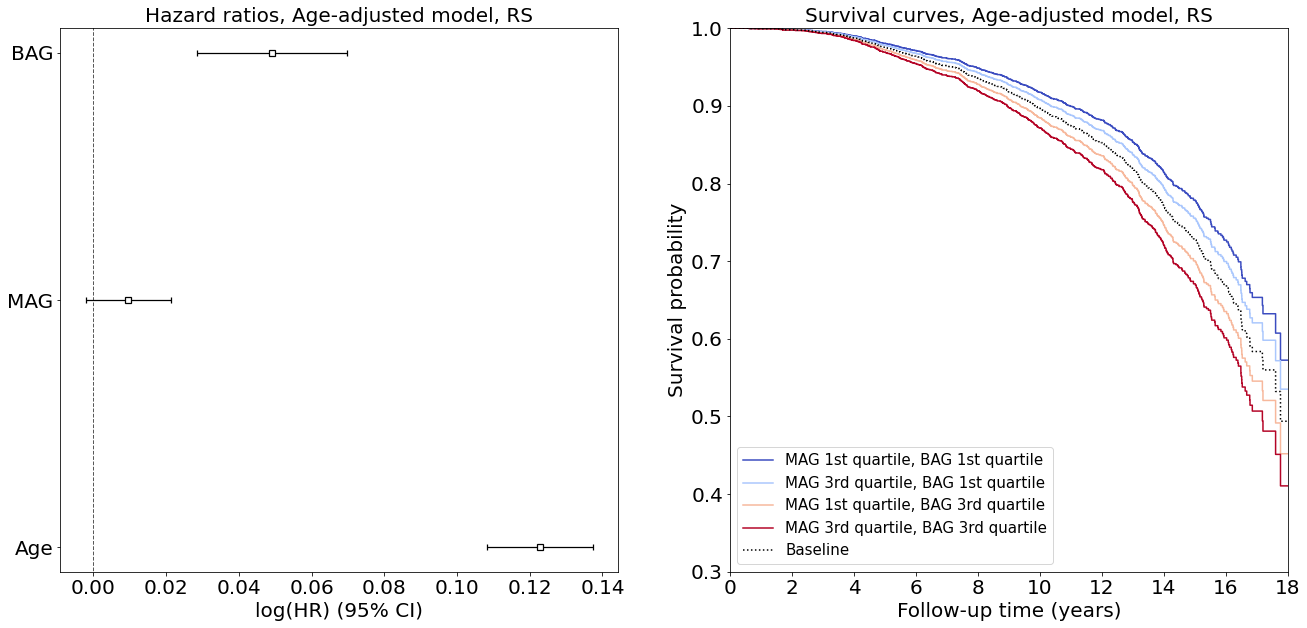

In [11]:
fig, ax = plt.subplots(figsize = (22,10))

###Plot Hazard ratio 
ax1=plt.subplot(121)
cph1.plot(columns = ['BAG', 'MAG', 'Age'], ax=ax1)
ax1.set_xlabel(ax1.get_xlabel(), fontsize=20)  # X-axis label
ax1.set_ylabel(ax1.get_ylabel(), fontsize=20)  # Y-axis label
ax1.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax1.set_facecolor('white')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
plt.title("Hazard ratios, Age-adjusted model, RS",fontsize=20)


###Plot Survival curve on quartiles
ax2=plt.subplot(122)
cph1.plot_partial_effects_on_outcome(['MAG','BAG'], values=[
 [-8.20671326, -3.07104492],
 [3.77366505,  -3.07104492],
 [-8.20671326, 4.13314247],
 [3.77366505,  4.13314247]], cmap='coolwarm',ax=ax2)

ax2.set_xlabel('Follow-up time (years)',fontsize = 20)
ax2.set_ylabel('Survival probability',fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax2.set_facecolor('white')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')


handles, labels = ax2.get_legend_handles_labels()
labels = ['MAG 1st quartile, BAG 1st quartile', 'MAG 3rd quartile, BAG 1st quartile', 'MAG 1st quartile, BAG 3rd quartile','MAG 3rd quartile, BAG 3rd quartile', 'Baseline'] 
ax2.legend(handles, labels,fontsize=15,facecolor='white')

plt.ylim([0.3, 1])
plt.xlim([0, 18])
plt.title("Survival curves, Age-adjusted model, RS",fontsize = 20)

# 3. Include all variables

## predict dementia

In [13]:
###CPH model
coxph = CoxPHFitter()
survival_df = survival[['Age', 'event_time_d', 'dementia', 'Lag Time', 'Sex', 'DM', 'BMI','Education','BAG', 'MAG']]
survival_df=survival_df.dropna()
survival_df=survival_df[survival_df.event_time_d>0]

cph_all = coxph.fit(survival_df,'event_time_d','dementia')
cph_all.summary[['coef', 'se(coef)', 'p']]


,coef,se(coef),p
covariate,,,
Age,0.177146,0.020559,6.905373e-18
Lag Time,0.027133,0.038285,4.784981e-01
Sex,-0.133362,0.175917,4.483915e-01
DM,0.307623,0.235415,1.913060e-01
BMI,-0.029508,0.021613,1.721700e-01
Education,0.143753,0.117582,2.214873e-01
BAG,0.156302,0.023750,4.669311e-11
MAG,-0.005234,0.012564,6.770121e-01


In [14]:
###1st and 3rd quartiles of BAG and MAG
print(np.quantile(survival_df['MAG'],[0.25,0.75]))
print(np.quantile(survival_df['BAG'],[0.25,0.75]))

[-8.14710159  3.89703822]
[-3.01473618  4.15740967]


Text(0.5, 1.0, 'Survival curves, All-covariates-adjusted model, RS')

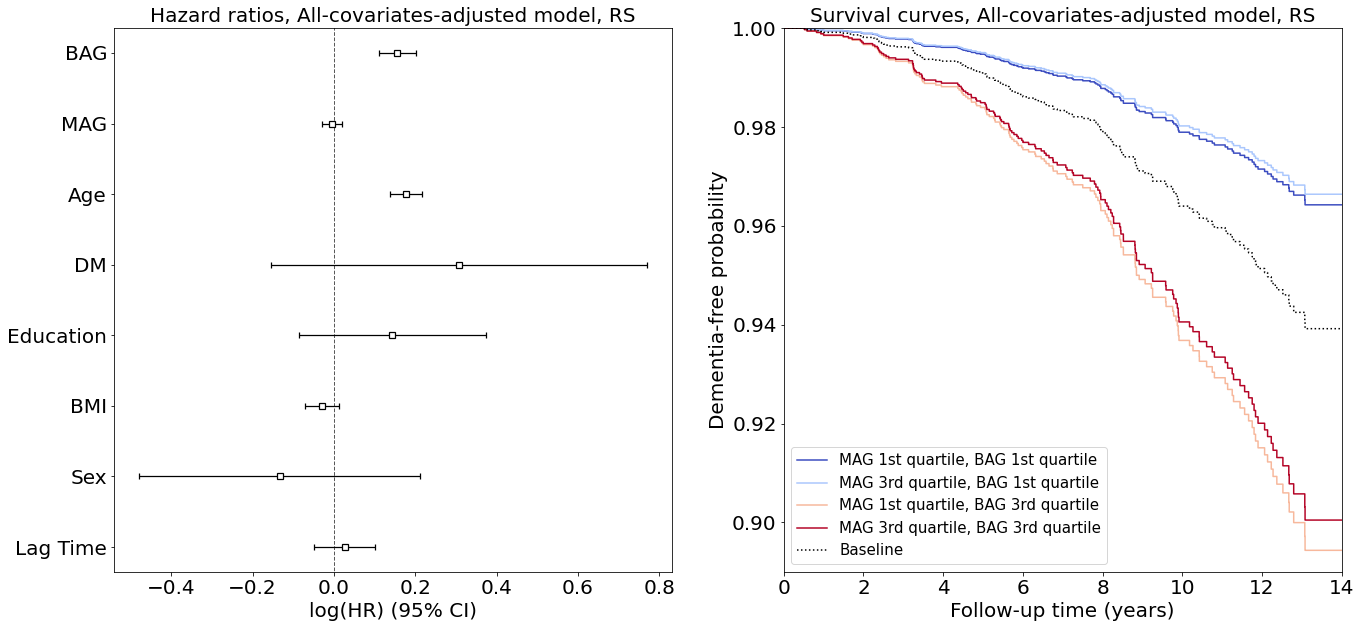

In [15]:
fig, ax = plt.subplots(figsize = (22,10))

###Plot Hazard ratio 
ax1=plt.subplot(121)
cph_all.plot(ax=ax1, columns = [ 'BAG', 'MAG','Age', "DM", "Education", "BMI","Sex","Lag Time" ])
ax1.set_xlabel(ax1.get_xlabel(), fontsize=20)  # X-axis label
ax1.set_ylabel(ax1.get_ylabel(), fontsize=20)  # Y-axis label
ax1.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax1.set_facecolor('white')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
plt.title("Hazard ratios, All-covariates-adjusted model, RS",fontsize=20)


###Plot Survival curve on quartiles
ax2=plt.subplot(122)
cph_all.plot_partial_effects_on_outcome(['MAG','BAG'], values=[
 [-8.14710159, -3.01473618],
 [3.89703822,  -3.01473618],
 [-8.14710159, 4.15740967],
 [3.89703822,  4.15740967]], cmap='coolwarm',ax=ax2)

ax2.set_xlabel('Follow-up time (years)',fontsize = 20)
ax2.set_ylabel('Dementia-free probability',fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax2.set_facecolor('white')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
handles, labels = ax2.get_legend_handles_labels()
labels = ['MAG 1st quartile, BAG 1st quartile', 'MAG 3rd quartile, BAG 1st quartile', 'MAG 1st quartile, BAG 3rd quartile','MAG 3rd quartile, BAG 3rd quartile', 'Baseline'] 
ax2.legend(handles, labels,fontsize=15,facecolor='white')

plt.ylim([0.89, 1])
plt.xlim([0, 14])
plt.title("Survival curves, All-covariates-adjusted model, RS",fontsize = 20)




# predict mortality

In [16]:
###CPH model
survival_df = survival[['Age', 'event_time_m', 'mortality', 'Lag Time', 'Sex', 'DM', 'BMI','Education','BAG', 'MAG']]
survival_df=survival_df.dropna()
survival_df=survival_df[survival_df.event_time_m>0]

cph_all = coxph.fit(survival_df,'event_time_m','mortality')
cph_all.summary[['coef', 'se(coef)', 'p']]



,coef,se(coef),p
covariate,,,
Age,0.158398,0.009971,7.920158e-57
Lag Time,0.077340,0.017326,8.047727e-06
Sex,-0.658125,0.083324,2.826245e-15
DM,0.184039,0.112827,1.028578e-01
BMI,-0.003684,0.010523,7.262924e-01
Education,0.030515,0.056076,5.863196e-01
BAG,0.069522,0.011238,6.164667e-10
MAG,0.014674,0.006248,1.884162e-02


In [17]:
###1st and 3rd quartiles of BAG and MAG
print(np.quantile(survival_df['MAG'],[0.25,0.75]))
print(np.quantile(survival_df['BAG'],[0.25,0.75]))

[-8.13254957  3.88489829]
[-3.02433395  4.15939522]


Text(0.5, 1.0, 'Survival curves, All-covariates-adjusted model, RS')

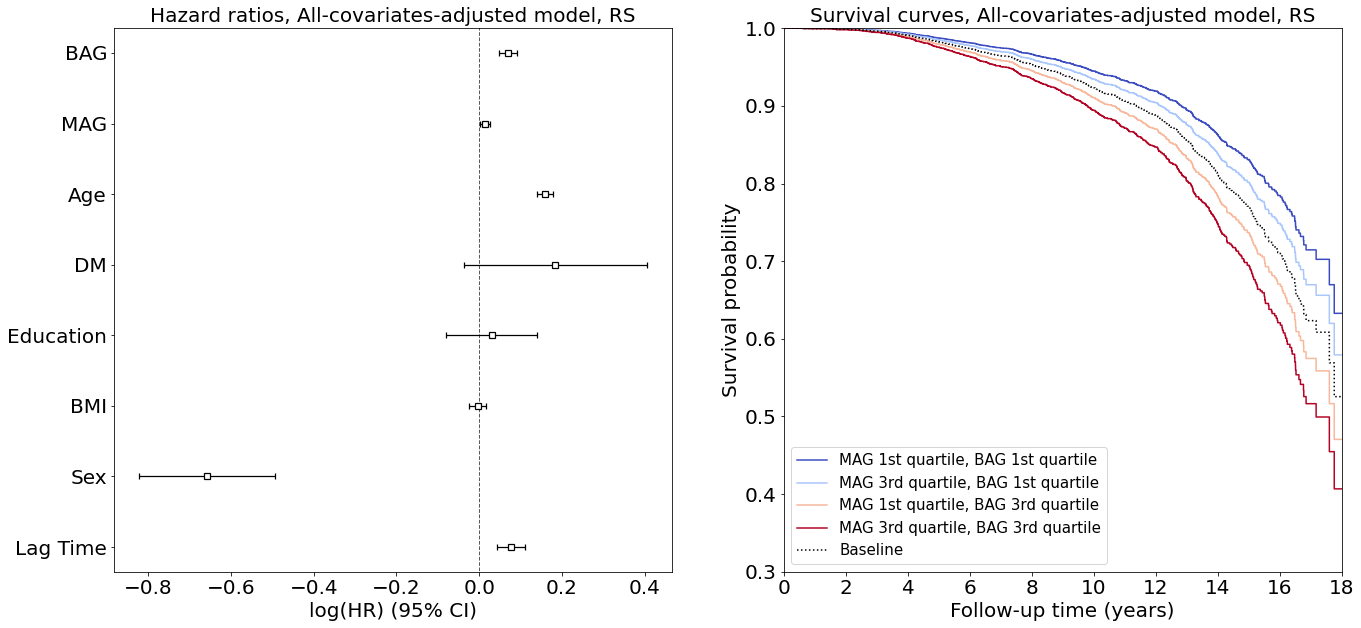

In [18]:
fig, ax = plt.subplots(figsize = (22,10))

###Plot Hazard ratio 
ax1=plt.subplot(121)
cph_all.plot(ax=ax1, columns = [ 'BAG', 'MAG','Age', "DM", "Education", "BMI","Sex","Lag Time" ])
ax1.set_xlabel(ax1.get_xlabel(), fontsize=20)  # X-axis label
ax1.set_ylabel(ax1.get_ylabel(), fontsize=20)  # Y-axis label
ax1.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
ax1.set_facecolor('white')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
plt.title("Hazard ratios, All-covariates-adjusted model, RS",fontsize=20)


###Plot Survival curve on quartiles
ax2=plt.subplot(122)
cph_all.plot_partial_effects_on_outcome(['MAG','BAG'], values=[
 [-8.13254957, -3.02433395],
 [3.89240564,  -3.02433395],
 [-8.13254957, 4.15939522],
 [3.89240564,  4.15939522]], cmap='coolwarm',ax=ax2)

ax2.set_xlabel('Follow-up time (years)',fontsize = 20)
ax2.set_ylabel('Survival probability',fontsize = 20)
ax2.set_facecolor('white')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.tick_params(axis='both', which='major', labelsize=20)  # Tick labels

handles, labels = ax2.get_legend_handles_labels()
labels = ['MAG 1st quartile, BAG 1st quartile', 'MAG 3rd quartile, BAG 1st quartile', 'MAG 1st quartile, BAG 3rd quartile','MAG 3rd quartile, BAG 3rd quartile', 'Baseline'] 
ax2.legend(handles, labels,fontsize=15,facecolor='white')

plt.ylim([0.3, 1])
plt.xlim([0, 18])
plt.title("Survival curves, All-covariates-adjusted model, RS",fontsize = 20)

